In [1]:
import sys
sys.path.append('../xgboost/python-package')

import pandas as pd
import numpy as np
import xgboost as xgb
import matplotlib.pyplot as plt

from sklearn.utils import class_weight
from sklearn.metrics import ConfusionMatrixDisplay, classification_report
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, recall_score ,precision_score
from sklearn.model_selection import StratifiedShuffleSplit



import pickle
import torch
torch.cuda.is_available()
device = torch.device('cuda')

from aux_xgb_functions import XGB_crossval, recall_mod_v1, LabelEncoder

In [2]:
Labels_dict={'Hierarchical':['Transient','Stochastic', 'Periodic'],
            'Periodic':['E','RRL','LPV','Periodic-Other','DSCT','CEP'],
            'Stochastic':['QSO','AGN', 'YSO','Blazar', 'CV/Nova'],
            'Transient':['SNIa','SNII','SNIbc','SLSN'],
            'Complete':['SNIa','SNII','SNIbc','SLSN','QSO','AGN', 'YSO','Blazar', 'CV/Nova','E','RRL','LPV','Periodic-Other','DSCT','CEP']
           }

Params_dict={
    'Stochastic':{'eta': 0.025,'min_child_weight': 6,'subsample': 0.9,'gamma': 1.5,
                  'colsample_bytree': 0.95,'max_delta_step': 5,'max_depth': 4},
    'Periodic':{'eta': 0.025,'min_child_weight': 1,'subsample': 0.9,'gamma': 1.4,
                  'colsample_bytree': 0.95,'max_delta_step': 5,'max_depth': 3},
    'Transient':{'eta': 0.1,'min_child_weight': 6,'subsample': 0.9,'gamma': 1.5,
                  'colsample_bytree': 0.8,'max_delta_step': 5,'max_depth': 1}    
}

In [3]:
df1 = pd.read_csv(r"/home/vicente/Jupyter_notebooks/features_LCC.csv")
df2 = pd.read_csv(r"/home/vicente/Jupyter_notebooks/labels_LCC.csv")

X = df1.drop(['oid'],axis=1).copy()
y_o = df2['class_original'].copy()
y_h = df2['class_hierarchical'].copy()

item_counts = y_h.value_counts(normalize=False)
print(item_counts)
item_counts = y_o.value_counts(normalize=False)
print(item_counts)

Periodic      87065
Stochastic    34713
Transient      1718
Name: class_hierarchical, dtype: int64
E                 37901
RRL               32482
QSO               26168
LPV               14076
AGN                4667
YSO                1740
SNIa               1272
Blazar             1267
Periodic-Other     1256
CV/Nova             871
DSCT                732
CEP                 618
SNII                328
SNIbc                94
SLSN                 24
Name: class_original, dtype: int64


Validation 1/10
Validation 2/10
Validation 3/10
Validation 4/10
Validation 5/10
Validation 6/10
Validation 7/10
Validation 8/10
Validation 9/10
Validation 10/10
Precision: Mean = 0.83  Std = 0.00
Recall: Mean = 0.89  Std = 0.00
F1-score: Mean = 0.85  Std = 0.00
Mod. Recall: Mean = 0.89  Std = 0.01
Min. Recall: Mean = 0.71  Std = 0.02


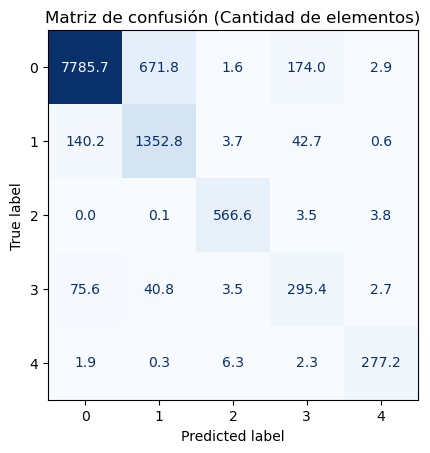

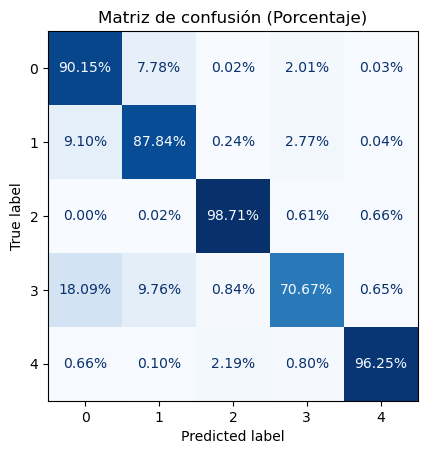

In [4]:
subclass= 'Stochastic'

#Vanilla

X_sc = X.loc[y_h==subclass,:]
y_sc = y_o.loc[y_h==subclass]
XGB_crossval(X_sc,y_sc,params=Params_dict[subclass])

Validation 1/10
Validation 2/10
Validation 3/10
Validation 4/10
Validation 5/10
Validation 6/10
Validation 7/10
Validation 8/10
Validation 9/10
Validation 10/10
Precision: Mean = 0.81  Std = 0.00
Recall: Mean = 0.89  Std = 0.00
F1-score: Mean = 0.84  Std = 0.00
Mod. Recall: Mean = 0.89  Std = 0.01
Min. Recall: Mean = 0.72  Std = 0.03


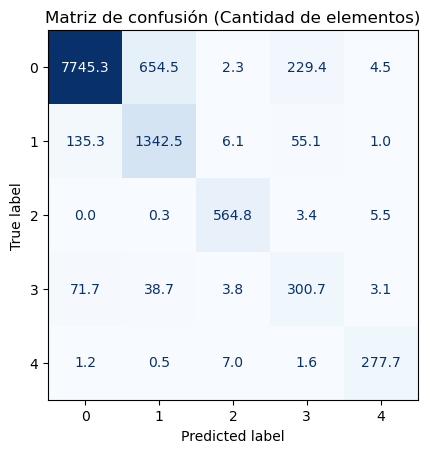

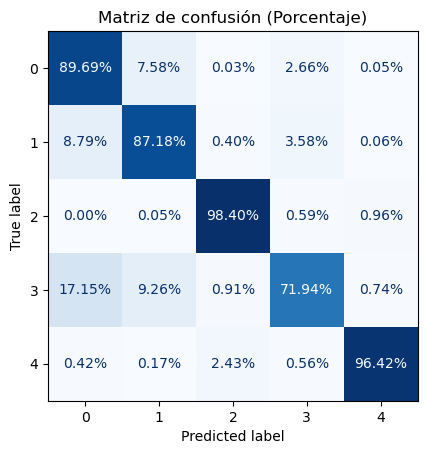

In [5]:
subclass= 'Stochastic'
X_sc = X.loc[y_h==subclass,:]
y_sc = y_o.loc[y_h==subclass]
XGB_crossval(X_sc,y_sc,params=Params_dict[subclass],mod=True)

Validation 1/10
Validation 2/10
Validation 3/10
Validation 4/10
Validation 5/10
Validation 6/10
Validation 7/10
Validation 8/10
Validation 9/10
Validation 10/10
Precision: Mean = 0.63  Std = 0.00
Recall: Mean = 0.86  Std = 0.01
F1-score: Mean = 0.68  Std = 0.00
Mod. Recall: Mean = 0.80  Std = 0.02
Min. Recall: Mean = 0.74  Std = 0.01


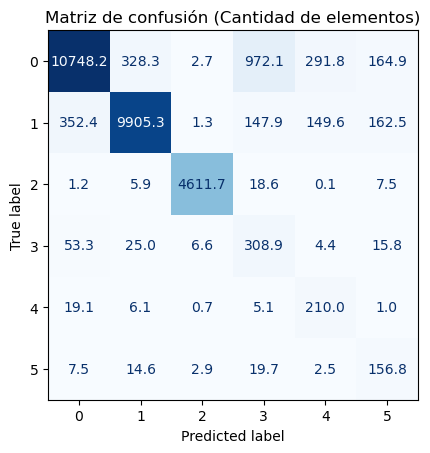

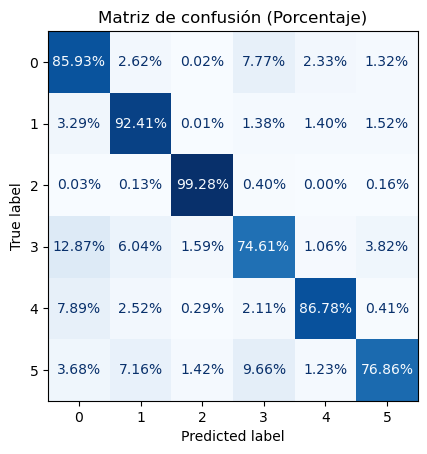

In [6]:
subclass= 'Periodic'


X_sc = X.loc[y_h==subclass,:]
y_sc = y_o.loc[y_h==subclass]
XGB_crossval(X_sc,y_sc,params=Params_dict[subclass])

Validation 1/10
Validation 2/10
Validation 3/10
Validation 4/10
Validation 5/10
Validation 6/10
Validation 7/10
Validation 8/10
Validation 9/10
Validation 10/10
Precision: Mean = 0.62  Std = 0.00
Recall: Mean = 0.86  Std = 0.01
F1-score: Mean = 0.67  Std = 0.00
Mod. Recall: Mean = 0.81  Std = 0.01
Min. Recall: Mean = 0.74  Std = 0.01


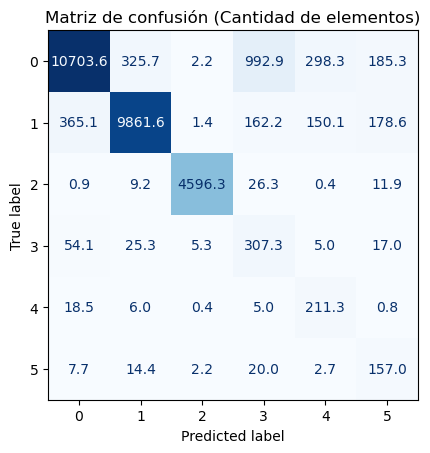

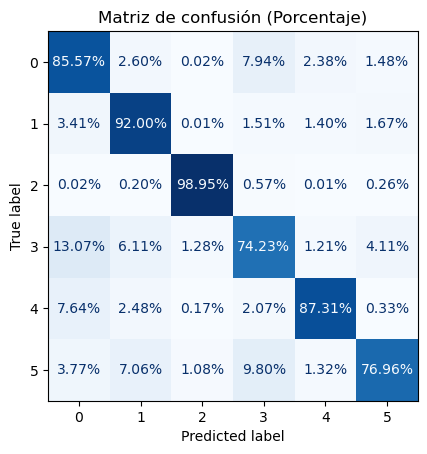

In [7]:
subclass= 'Periodic'


X_sc = X.loc[y_h==subclass,:]
y_sc = y_o.loc[y_h==subclass]
XGB_crossval(X_sc,y_sc,params=Params_dict[subclass],mod=True)

Validation 1/10
Validation 2/10
Validation 3/10
Validation 4/10
Validation 5/10
Validation 6/10
Validation 7/10
Validation 8/10
Validation 9/10
Validation 10/10
Precision: Mean = 0.54  Std = 0.03
Recall: Mean = 0.57  Std = 0.04
F1-score: Mean = 0.55  Std = 0.03
Mod. Recall: Mean = 0.35  Std = 0.11
Min. Recall: Mean = 0.27  Std = 0.09


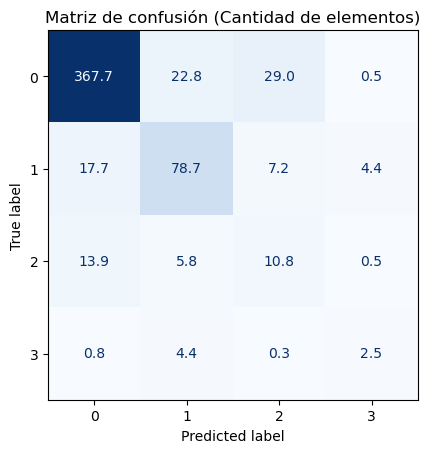

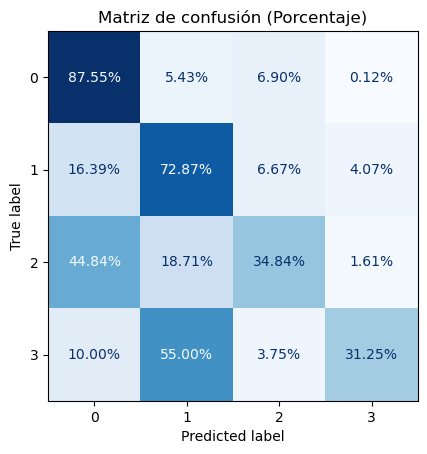

In [8]:
subclass= 'Transient'


X_sc = X.loc[y_h==subclass,:]
y_sc = y_o.loc[y_h==subclass]
XGB_crossval(X_sc,y_sc,params=Params_dict[subclass])

Validation 1/10
Validation 2/10
Validation 3/10
Validation 4/10
Validation 5/10
Validation 6/10
Validation 7/10
Validation 8/10
Validation 9/10
Validation 10/10
Precision: Mean = 0.52  Std = 0.03
Recall: Mean = 0.60  Std = 0.05
F1-score: Mean = 0.54  Std = 0.03
Mod. Recall: Mean = 0.51  Std = 0.10
Min. Recall: Mean = 0.42  Std = 0.10


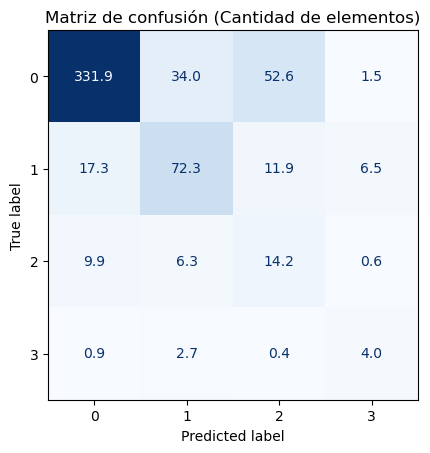

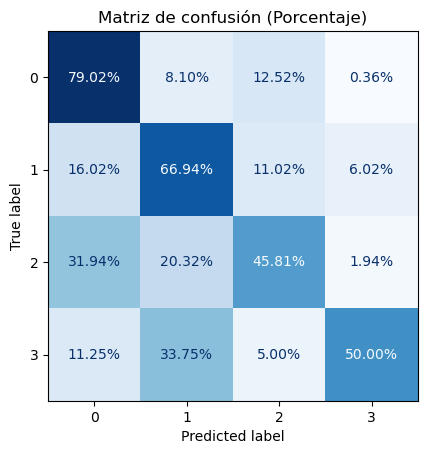

In [9]:
subclass= 'Transient'


X_sc = X.loc[y_h==subclass,:]
y_sc = y_o.loc[y_h==subclass]
XGB_crossval(X_sc,y_sc,params=Params_dict[subclass],mod=True)

# Scaling

In [85]:
from sklearn.preprocessing import QuantileTransformer

qt = QuantileTransformer(n_quantiles=10, random_state=42)
X_sc_qt=pd.DataFrame(qt.fit_transform(X_sc))

In [9]:
n_splits=10
sss = StratifiedShuffleSplit(n_splits=n_splits, test_size=0.33, random_state=42)
i=0

y_sc_enc=LabelEncoder(y_sc)
n_classes=len(y_sc_enc.unique())
precisions=np.zeros(n_splits)
recalls=np.zeros(n_splits)
modrecalls=np.zeros(n_splits)
minrecalls=np.zeros(n_splits)
f1s=np.zeros(n_splits)
rocaucs=np.zeros(n_splits)
matrixes=np.zeros((n_splits,n_classes,n_classes))
matrixesn=np.zeros((n_splits,n_classes,n_classes))

for train_index, test_index in sss.split(X_sc, y_sc_enc):
    print(f'Validation {i+1}/{n_splits}')
    X_train, X_valid = X_sc.iloc[train_index], X_sc.iloc[test_index]
    y_train, y_valid = y_sc_enc.iloc[train_index], y_sc_enc.iloc[test_index]
    

    ###Step 1
    class_weights = list(class_weight.compute_class_weight('balanced', classes=np.unique(y_train), y=y_train))
    dtrain = xgb.DMatrix(data=X_train, label=y_train
                             ,weight=pd.Series(y_train).map(lambda x: class_weights[x])
                            )
    dvalid=xgb.DMatrix(data=X_valid, label=y_valid)

    params=Params_dict[subclass]
    params['eval_metric']= 'mlogloss'
    params['objective']= 'multi:softprob'
    params['booster']= 'gbtree'
    params['tree_method']= 'gpu_hist'
    params['num_class']= n_classes
    watchlist = [(dtrain, 'train')]
    xgb_model = xgb.train(params, dtrain, 1500,
                            evals=watchlist,
                            verbose_eval=False,
                            early_stopping_rounds=15,
                            balanced_bootstrap=True)

    preds = xgb_model.predict(dvalid, iteration_range=(1,xgb_model.best_iteration + 1))

    for j in range(len(preds)):
        preds[j] = np.exp(preds[j])/np.sum(np.exp(preds[j]))       
    y_pred = np.array(np.argmax(np.array(preds),axis=1), ndmin=1)

    precisions[i]=precision_score(y_valid,y_pred,average='macro')
    recalls[i]=recall_score(y_valid,y_pred,average='macro')
    f1s[i]=f1_score(y_valid,y_pred,average='macro')
    matrixes[i]=confusion_matrix(y_valid,y_pred)
    matrixesn[i]=confusion_matrix(y_valid,y_pred,normalize='true')
    minrecalls[i]=np.min(recall_score(y_valid, y_pred, average=None))
    modrecalls[i]=recall_mod_v1(y_valid, y_pred, 1/LabelEncoder(y_sc).value_counts(normalize=True))

    i=i+1



print(f'Precision: Mean = {np.mean(precisions):.2f}  Std = {np.std(precisions):.2f}')
print(f'Recall: Mean = {np.mean(recalls):.2f}  Std = {np.std(recalls):.2f}')
print(f'F1-score: Mean = {np.mean(f1s):.2f}  Std = {np.std(f1s):.2f}')
print(f'Mod. Recall: Mean = {np.mean(modrecalls):.2f}  Std = {np.std(modrecalls):.2f}')
print(f'Min. Recall: Mean = {np.mean(minrecalls):.2f}  Std = {np.std(minrecalls):.2f}')

disp=ConfusionMatrixDisplay(np.mean(matrixes,axis=0)#, display_labels=Labels_dict[subclass]
                           )
disp.plot(cmap='Blues',values_format='.1f',colorbar=False)
plt.title('Matriz de confusión (Cantidad de elementos)')

disp=ConfusionMatrixDisplay(np.mean(matrixesn,axis=0)#, display_labels=Labels_dict[subclass]
                           )
disp.plot(cmap='Blues',values_format='.2%',colorbar=False)
plt.title('Matriz de confusión (Porcentaje)')
plt.show()

Validation 1/10


TypeError: train() got an unexpected keyword argument 'bootstrapping'

Validation 1/10
Validation 2/10
Validation 3/10
Validation 4/10
Validation 5/10
Validation 6/10
Validation 7/10
Validation 8/10
Validation 9/10
Validation 10/10
Precision: Mean = 0.83  Std = 0.01
Recall: Mean = 0.89  Std = 0.00
F1-score: Mean = 0.85  Std = 0.00
Mod. Recall: Mean = 0.89  Std = 0.01
Min. Recall: Mean = 0.71  Std = 0.02


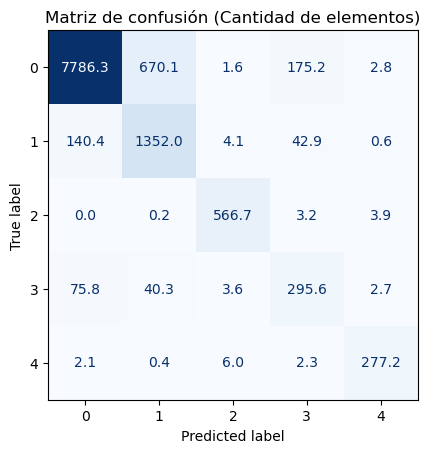

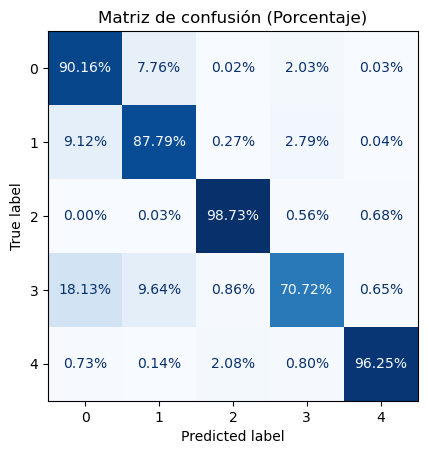

In [44]:
qt = QuantileTransformer(n_quantiles=10, output_distribution='normal',random_state=42)
X_sc_qt=pd.DataFrame(qt.fit_transform(X_sc))

n_splits=10
sss = StratifiedShuffleSplit(n_splits=n_splits, test_size=0.33, random_state=42)
i=0
n_classes=len(y_sc_enc.unique())
precisions=np.zeros(n_splits)
recalls=np.zeros(n_splits)
modrecalls=np.zeros(n_splits)
minrecalls=np.zeros(n_splits)
f1s=np.zeros(n_splits)
rocaucs=np.zeros(n_splits)
matrixes=np.zeros((n_splits,n_classes,n_classes))
matrixesn=np.zeros((n_splits,n_classes,n_classes))

for train_index, test_index in sss.split(X_sc, y_sc_enc):
    print(f'Validation {i+1}/{n_splits}')
    X_train, X_valid = X_sc_qt.iloc[train_index], X_sc_qt.iloc[test_index]
    y_train, y_valid = y_sc_enc.iloc[train_index], y_sc_enc.iloc[test_index]
    

    ###Step 1
    class_weights = list(class_weight.compute_class_weight('balanced', classes=np.unique(y_train), y=y_train))
    dtrain = xgb.DMatrix(data=X_train, label=y_train
                             ,weight=pd.Series(y_train).map(lambda x: class_weights[x])
                            )
    dvalid=xgb.DMatrix(data=X_valid, label=y_valid)

    params={}
    params['eta']=0.025
    params['min_child_weight']=6
    params['subsample']=0.9
    params['gamma']=1.5
    params['colsample_bytree']=0.95
    params['max_delta_step']=5
    params['eval_metric']= 'mlogloss'
    params['objective']= 'multi:softprob'
    params['booster']= 'gbtree'
    params['tree_method']= 'gpu_hist'
    params['num_class']= n_classes
    params['max_depth'] = 4
    watchlist = [(dtrain, 'train')]
    xgb_model = xgb.train(params, dtrain, 500,
                            evals=watchlist,
                            verbose_eval=False,
                            early_stopping_rounds=15)

    preds = xgb_model.predict(dvalid, iteration_range=(1,xgb_model.best_iteration + 1))

    for j in range(len(preds)):
        preds[j] = np.exp(preds[j])/np.sum(np.exp(preds[j]))       
    y_pred = np.array(np.argmax(np.array(preds),axis=1), ndmin=1)

    precisions[i]=precision_score(y_valid,y_pred,average='macro')
    recalls[i]=recall_score(y_valid,y_pred,average='macro')
    f1s[i]=f1_score(y_valid,y_pred,average='macro')
    matrixes[i]=confusion_matrix(y_valid,y_pred)
    matrixesn[i]=confusion_matrix(y_valid,y_pred,normalize='true')
    minrecalls[i]=np.min(recall_score(y_valid, y_pred, average=None))
    modrecalls[i]=recall_mod_v1(y_valid, y_pred, 1/LabelEncoder(y_sc).value_counts(normalize=True))

    i=i+1



print(f'Precision: Mean = {np.mean(precisions):.2f}  Std = {np.std(precisions):.2f}')
print(f'Recall: Mean = {np.mean(recalls):.2f}  Std = {np.std(recalls):.2f}')
print(f'F1-score: Mean = {np.mean(f1s):.2f}  Std = {np.std(f1s):.2f}')
print(f'Mod. Recall: Mean = {np.mean(modrecalls):.2f}  Std = {np.std(modrecalls):.2f}')
print(f'Min. Recall: Mean = {np.mean(minrecalls):.2f}  Std = {np.std(minrecalls):.2f}')

disp=ConfusionMatrixDisplay(np.mean(matrixes,axis=0)#, display_labels=Labels_dict[subclass]
                           )
disp.plot(cmap='Blues',values_format='.1f',colorbar=False)
plt.title('Matriz de confusión (Cantidad de elementos)')

disp=ConfusionMatrixDisplay(np.mean(matrixesn,axis=0)#, display_labels=Labels_dict[subclass]
                           )
disp.plot(cmap='Blues',values_format='.2%',colorbar=False)
plt.title('Matriz de confusión (Porcentaje)')
plt.show()

# PCA babeeeh

In [53]:
from sklearn.decomposition import PCA

pca = PCA(random_state=42)
pca.fit(X_sc_qt.fillna(0))

PCA(random_state=42)

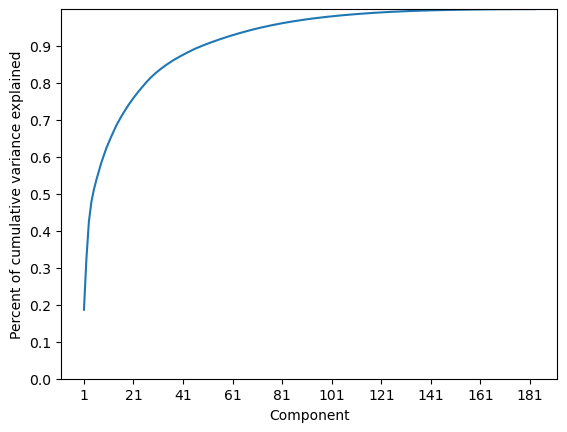

In [68]:
plt.plot(range(1, 184), np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Component') 
plt.xticks(range(1, 184, 20))
plt.ylabel('Percent of cumulative variance explained')
plt.ylim(0, 1)
plt.yticks(np.arange(0, 1, step=0.1))
plt.show()

In [67]:
index = np.argmax(np.cumsum(pca.explained_variance_ratio_) > 0.95)
print("Index where value surpasses the threshold:", index)

Index where value surpasses the threshold: 72


In [74]:
loadings = pca.components_.T * np.sqrt(pca.explained_variance_)
loadings_df = pd.DataFrame(loadings, columns=["PC" + str(x) for x in range(1, 184)], index=X_sc.columns)

In [90]:
component_df = pd.DataFrame(pca.transform(X_sc.fillna(-999)), columns=["PC" + str(x) for x in range(1, 184)])
X_48 = component_df.loc[:, ["PC" + str(x) for x in range(1, 73)]]

C:\Users\vicen\anaconda3\lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but PCA was fitted without feature names
  warnings.warn(


Validation 1/10
Validation 2/10
Validation 3/10
Validation 4/10
Validation 5/10
Validation 6/10
Validation 7/10
Validation 8/10
Validation 9/10
Validation 10/10
Precision: Mean = 0.38  Std = 0.01
Recall: Mean = 0.52  Std = 0.01
F1-score: Mean = 0.41  Std = 0.01
Mod. Recall: Mean = 0.54  Std = 0.01
Min. Recall: Mean = 0.36  Std = 0.02


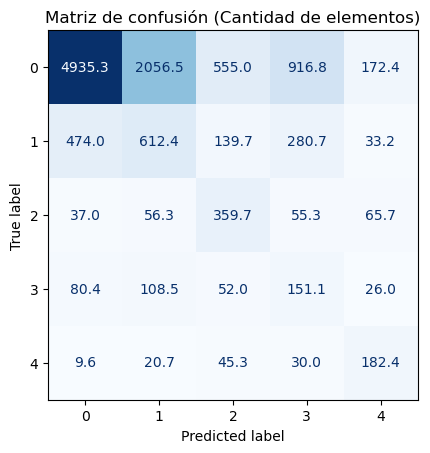

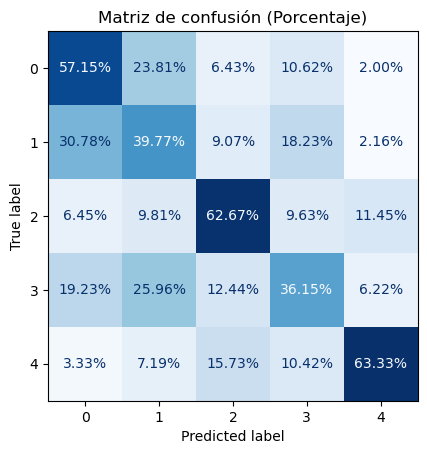

In [91]:
n_splits=10
sss = StratifiedShuffleSplit(n_splits=n_splits, test_size=0.33, random_state=42)
i=0
n_classes=len(y_sc_enc.unique())
precisions=np.zeros(n_splits)
recalls=np.zeros(n_splits)
modrecalls=np.zeros(n_splits)
minrecalls=np.zeros(n_splits)
f1s=np.zeros(n_splits)
rocaucs=np.zeros(n_splits)
matrixes=np.zeros((n_splits,n_classes,n_classes))
matrixesn=np.zeros((n_splits,n_classes,n_classes))

for train_index, test_index in sss.split(X_sc, y_sc_enc):
    print(f'Validation {i+1}/{n_splits}')
    X_train, X_valid = X_48.iloc[train_index], X_48.iloc[test_index]
    y_train, y_valid = y_sc_enc.iloc[train_index], y_sc_enc.iloc[test_index]
    

    ###Step 1
    class_weights = list(class_weight.compute_class_weight('balanced', classes=np.unique(y_train), y=y_train))
    dtrain = xgb.DMatrix(data=X_train, label=y_train
                             ,weight=pd.Series(y_train).map(lambda x: class_weights[x])
                            )
    dvalid=xgb.DMatrix(data=X_valid, label=y_valid)

    params={}
    params['eta']=0.025
    params['min_child_weight']=6
    params['subsample']=0.9
    params['gamma']=1.5
    params['colsample_bytree']=0.95
    params['max_delta_step']=5
    params['eval_metric']= 'mlogloss'
    params['objective']= 'multi:softprob'
    params['booster']= 'gbtree'
    params['tree_method']= 'gpu_hist'
    params['num_class']= n_classes
    params['max_depth'] = 4
    watchlist = [(dtrain, 'train')]
    xgb_model = xgb.train(params, dtrain, 500,
                            evals=watchlist,
                            verbose_eval=False,
                            early_stopping_rounds=15)

    preds = xgb_model.predict(dvalid, iteration_range=(1,xgb_model.best_iteration + 1))

    for j in range(len(preds)):
        preds[j] = np.exp(preds[j])/np.sum(np.exp(preds[j]))       
    y_pred = np.array(np.argmax(np.array(preds),axis=1), ndmin=1)

    precisions[i]=precision_score(y_valid,y_pred,average='macro')
    recalls[i]=recall_score(y_valid,y_pred,average='macro')
    f1s[i]=f1_score(y_valid,y_pred,average='macro')
    matrixes[i]=confusion_matrix(y_valid,y_pred)
    matrixesn[i]=confusion_matrix(y_valid,y_pred,normalize='true')
    minrecalls[i]=np.min(recall_score(y_valid, y_pred, average=None))
    modrecalls[i]=recall_mod_v1(y_valid, y_pred, 1/LabelEncoder(y_sc).value_counts(normalize=True))

    i=i+1



print(f'Precision: Mean = {np.mean(precisions):.2f}  Std = {np.std(precisions):.2f}')
print(f'Recall: Mean = {np.mean(recalls):.2f}  Std = {np.std(recalls):.2f}')
print(f'F1-score: Mean = {np.mean(f1s):.2f}  Std = {np.std(f1s):.2f}')
print(f'Mod. Recall: Mean = {np.mean(modrecalls):.2f}  Std = {np.std(modrecalls):.2f}')
print(f'Min. Recall: Mean = {np.mean(minrecalls):.2f}  Std = {np.std(minrecalls):.2f}')

disp=ConfusionMatrixDisplay(np.mean(matrixes,axis=0)#, display_labels=Labels_dict[subclass]
                           )
disp.plot(cmap='Blues',values_format='.1f',colorbar=False)
plt.title('Matriz de confusión (Cantidad de elementos)')

disp=ConfusionMatrixDisplay(np.mean(matrixesn,axis=0)#, display_labels=Labels_dict[subclass]
                           )
disp.plot(cmap='Blues',values_format='.2%',colorbar=False)
plt.title('Matriz de confusión (Porcentaje)')
plt.show()